# Defining Problem

Perusahaan jasa penyedia kredit memiliki masalah dengan pembayaran para nasabahnya. Perusahaan ingin memprediksi nasabah mana yang sekiranya bulan-bulan selanjutnya mengalami telat pembayaran atau tidak yang kemudian akan diputuskan lebih lanjut mengenai kreditnya

# Project Goals

1. Analisa Setia variable/feature yang mempengaruhi apakah nasabah akan telat bayar/gagal bayar di bulan senjutnya atau tidak
2. Membuat model yang mampu memprediksi nasabah yang akan telat bayar/gagal bayar di bulan senjutnya atau tidak

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('CreditCard.xls')
df = (df.loc[1:]).drop(columns = 'Unnamed: 0')
df = (df.reset_index()).drop(columns='index')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Deskripsi Variable : 

- X1 : Jml kredit yg diberikan (dollar taiwan/ NT dollar)
- X2 : Gender (1 : Female, 2: Male)
- X3 : Education (1 : Graduate School, 2 : University, 3 : Highschool, 4 : Others)
- X4 : Status Pernikahan (1 : Menikah, 2 : single, 3 : Others)
- X5 : Umur
- X6 - X11 : Histori pembayaran sebelumnya
    - X6 : histori pembayaran bulan Sept, X7 :histori pembayaran bulan Agustus dst. smpai april.
    - Nilainya : -1 (pay dully), 1 (telat 1 bulan bayar), 2 (telat 2 bulan bayar)..... 9 (telat 9 hingga diatas 9 bulan bayarnya)
- X12 - X17 : Jumlah bill statement (dollar taiwan/ NT dollar)
    - X12 : jmlh bill di bulan Sept, X13 : jml bill di bulan Agus, .... dst. sampai April.
- X18 - X23 : Jumlah payment/pembayaran kredit (dollar taiwan/ NT dollar)
    - X18 : jml payment di bulan Sept dst. sampai April
- __Y : Default payment (1=yes, 0=no)__ ==> Target

In [3]:
## Klasifikasi yg kategorikal dan numerikal continues

cat = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
num = [i for i in df.columns if i not in cat]

In [4]:
## buat dataframe baru untuk deskripsi statistik

df_stat = df.copy()
df_stat[num] = df_stat[num].astype('int')

# Data Description

In [5]:
dfDesc = []
for i in df.columns:
    if df[i].nunique() > 3 :
        bla = df[i].drop_duplicates().sample(3).values
    else :
        bla = df[i].drop_duplicates().values
    
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        bla
    ])
    
pd.DataFrame(dfDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,X1,object,0,0.0,81,"[40000, 350000, 16000]"
1,X2,object,0,0.0,2,"[2, 1]"
2,X3,object,0,0.0,7,"[1, 4, 0]"
3,X4,object,0,0.0,4,"[3, 1, 0]"
4,X5,object,0,0.0,56,"[52, 35, 42]"
5,X6,object,0,0.0,11,"[4, 6, 1]"
6,X7,object,0,0.0,11,"[8, 5, 6]"
7,X8,object,0,0.0,11,"[6, 1, 5]"
8,X9,object,0,0.0,11,"[7, -2, 3]"
9,X10,object,0,0.0,10,"[0, -1, 8]"


__Insight__ :

Tidak ada data null

# Stat Desc

In [6]:
df_stat.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X5,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
X12,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
X13,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
X14,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
X15,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
X16,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
X17,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
X18,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
X19,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


In [7]:
df_stat.describe(include='O')

,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


# Checking Outliers

In [8]:
Desc_outliers = []

for i in df_stat.describe().columns:
    Q1 = df_stat.describe()[i]['25%']
    Q3 = df_stat.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
    Desc_outliers.append([
        i,
        hitung,
        upper_fence,
        lower_fence
    ])

out = pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers",
    "Upper Fence",
    "Lower Fence"
])
out

,Data Features,Jumlah Outliers,Upper Fence,Lower Fence
0,X1,167,525000.000,-235000.000
1,X5,272,60.500,8.500
2,X12,2400,162389.375,-91739.625
3,X13,2395,155538.500,-88547.500
4,X14,2469,146412.500,-83581.500
5,X15,2622,132774.875,-75942.125
6,X16,2725,122831.750,-70878.250
7,X17,2693,121111.625,-70657.375
8,X18,2745,11015.000,-5009.000
9,X19,2714,11250.500,-5417.500


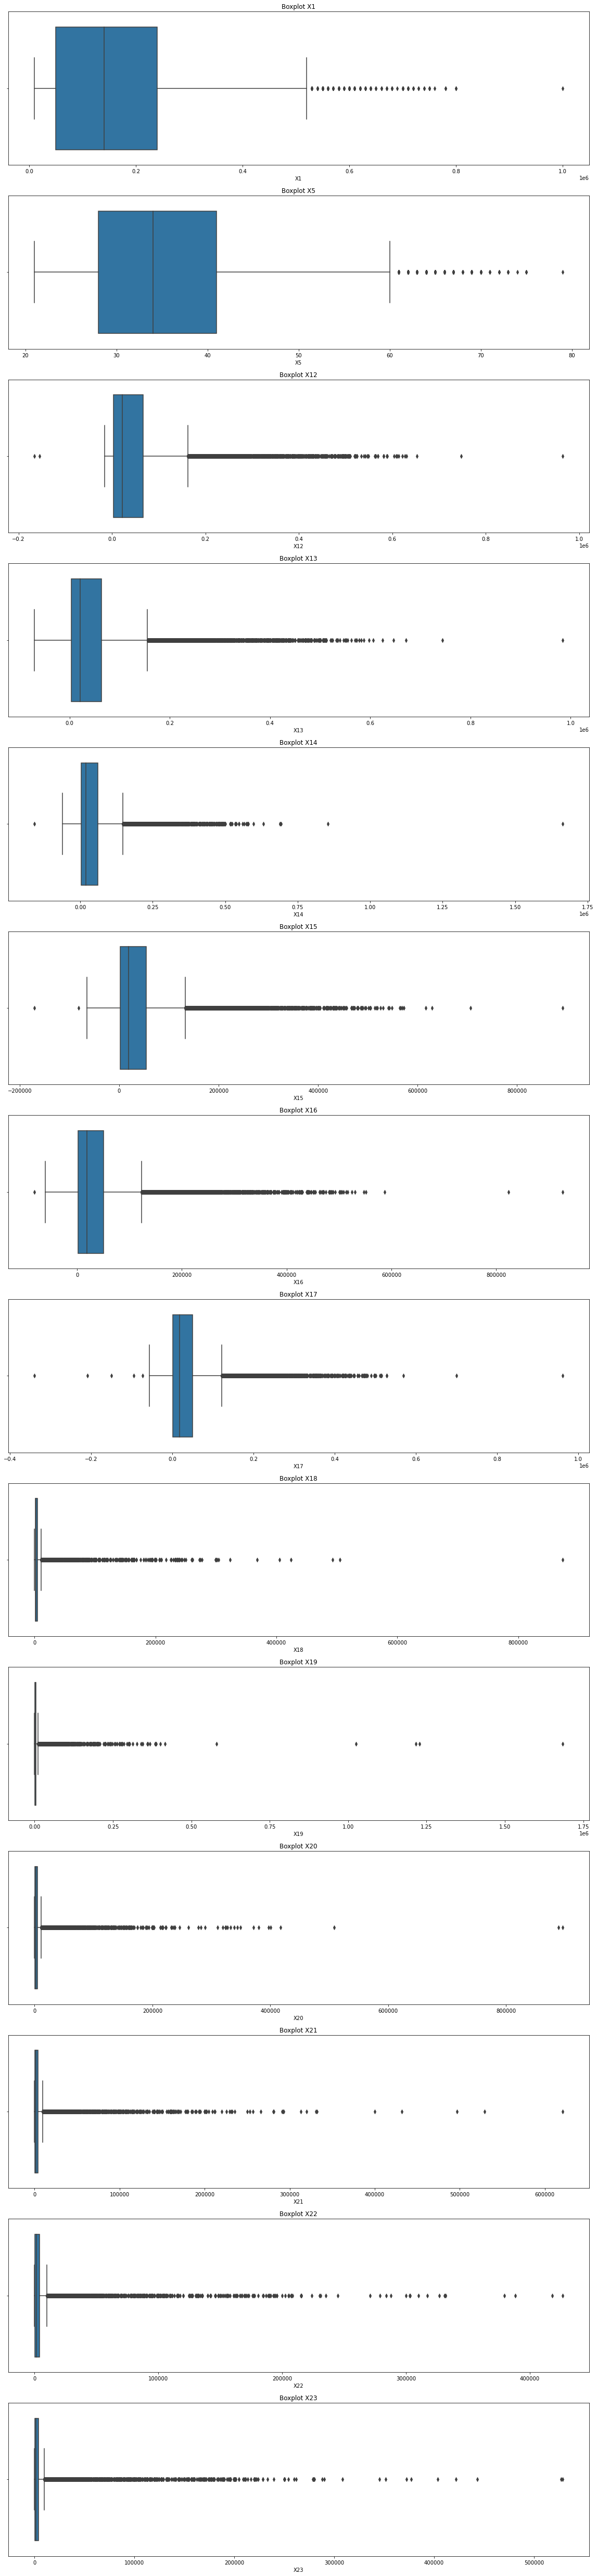

In [9]:
plt.figure(figsize=(20,90))
tes = 1

for i in df_stat.describe().columns:
    plt.subplot(14, 1, tes)
    sns.boxplot(x=df[i])
    plt.title('Boxplot ' + i)
    tes += 1

__Insight__ :

Dapat dilihat pada boxplot untuk masing-masing feature bertipe numerical continues memiliki cukup banyak outliers. dalam hal ini tidak dilakukan handling / drop data outliers untuk melihat data secara komperhensif

# EXPLANATORY DATA ANALYSIS

melakukan 2 tipe analisis yaitu Univariate dan Multi Variate

## Univariate

In [10]:
len(num)

14

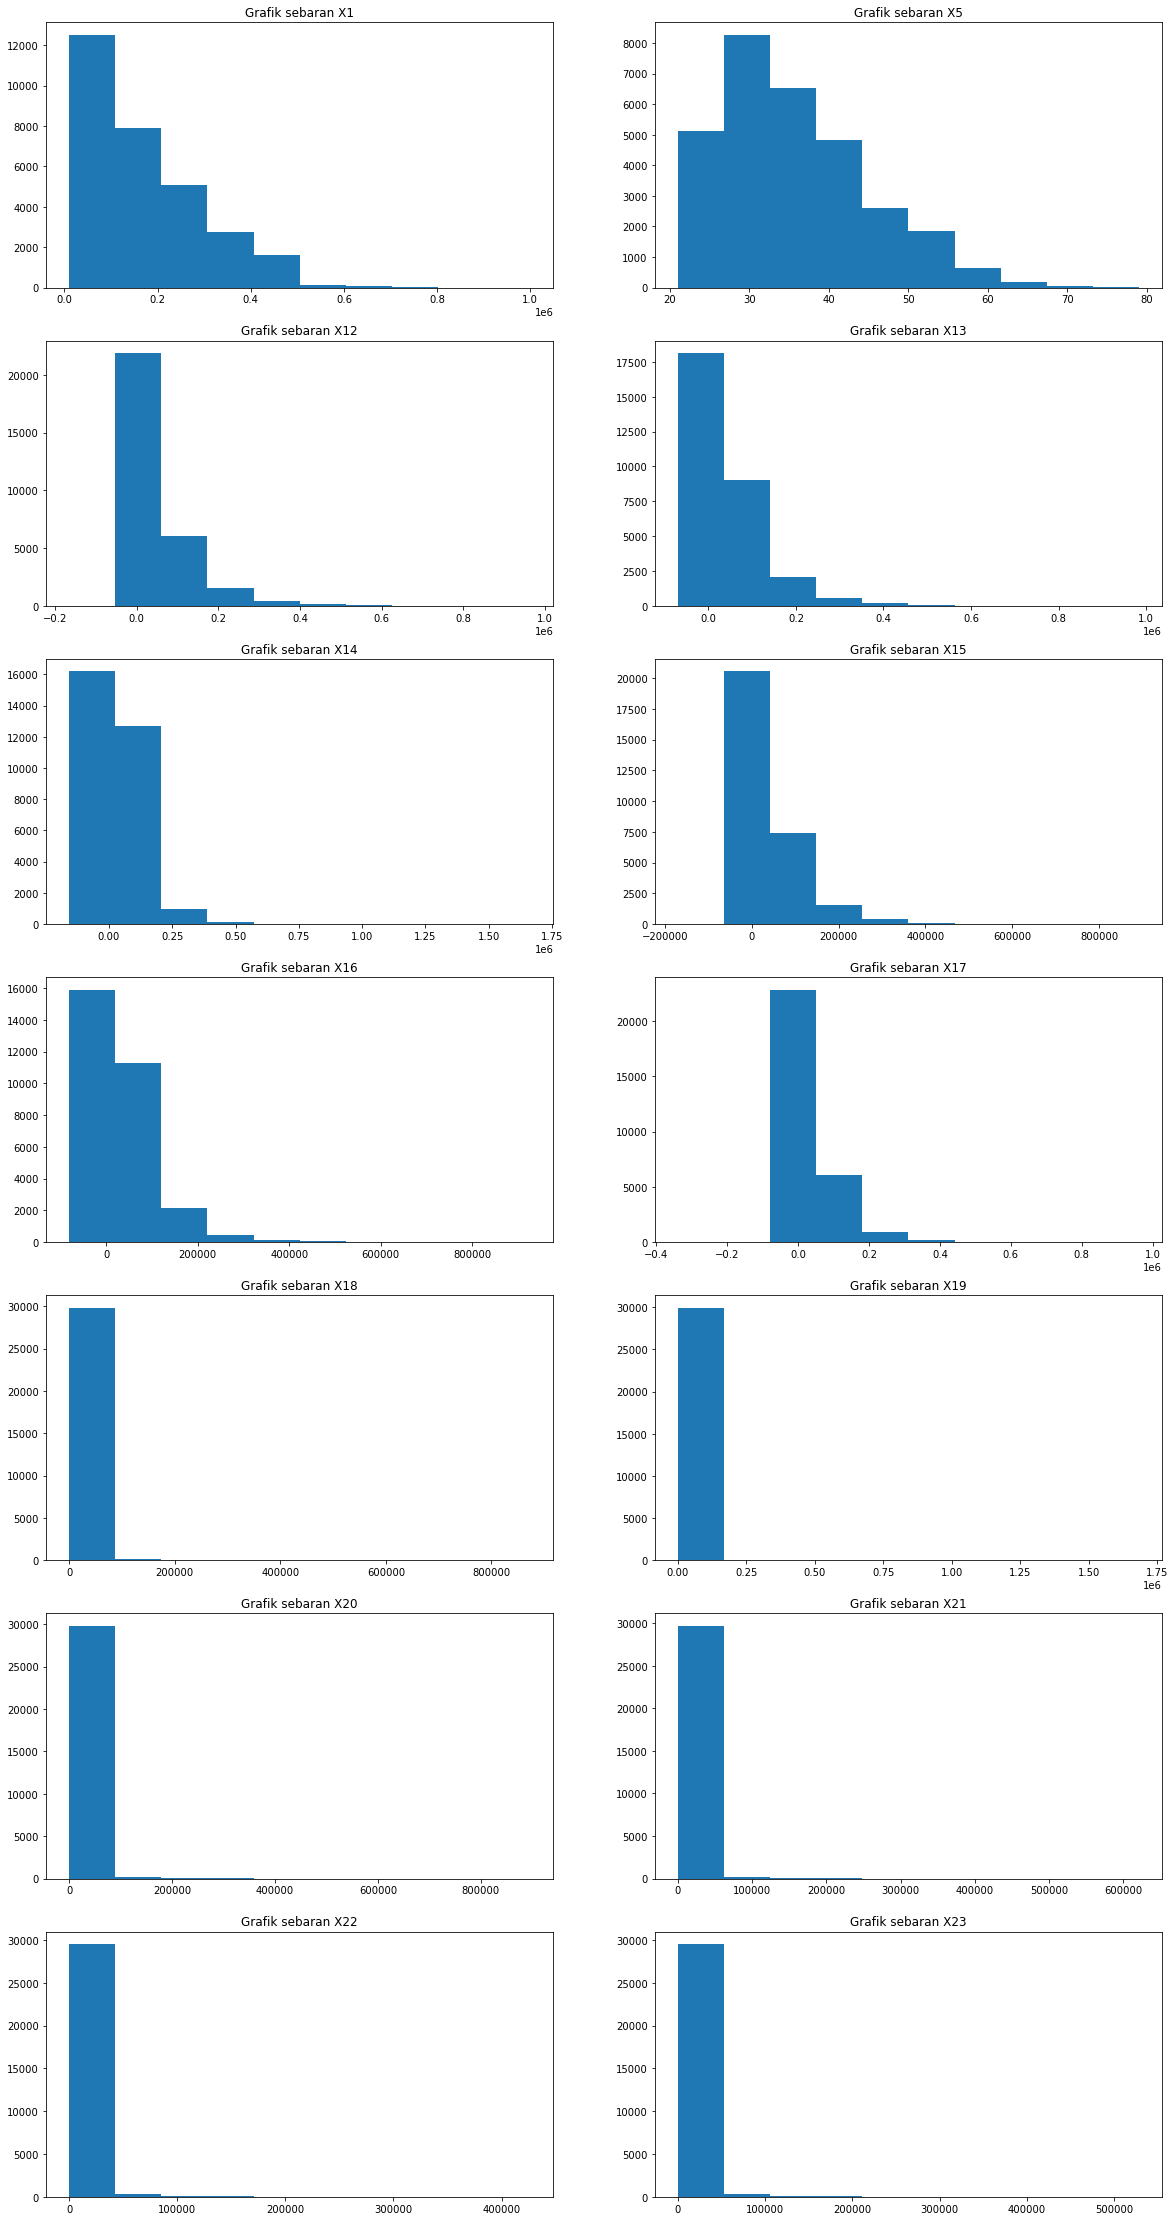

In [11]:
# plotting numerical continues features in histogram

plt.figure(figsize=(20,40))

for i in num:
    plt.subplot(7,2,(num.index(i))+1)
    plt.hist(df[i])
    plt.title('Grafik sebaran '+ i)

__Insight__ :

- Semua data skew positif dan tidak ada yg terdistribusi normal (untuk data numerical continues)
- Umur didominasi dari rentang 21 - 40 tahun

In [12]:
# def function for table univariate categorical

def tab_cat (x):
    table = pd.crosstab(index = df[x], columns = 'Jumlah')
    return table

In [13]:
tab_cat('X2')

col_0,Jumlah
X2,
1,11888
2,18112


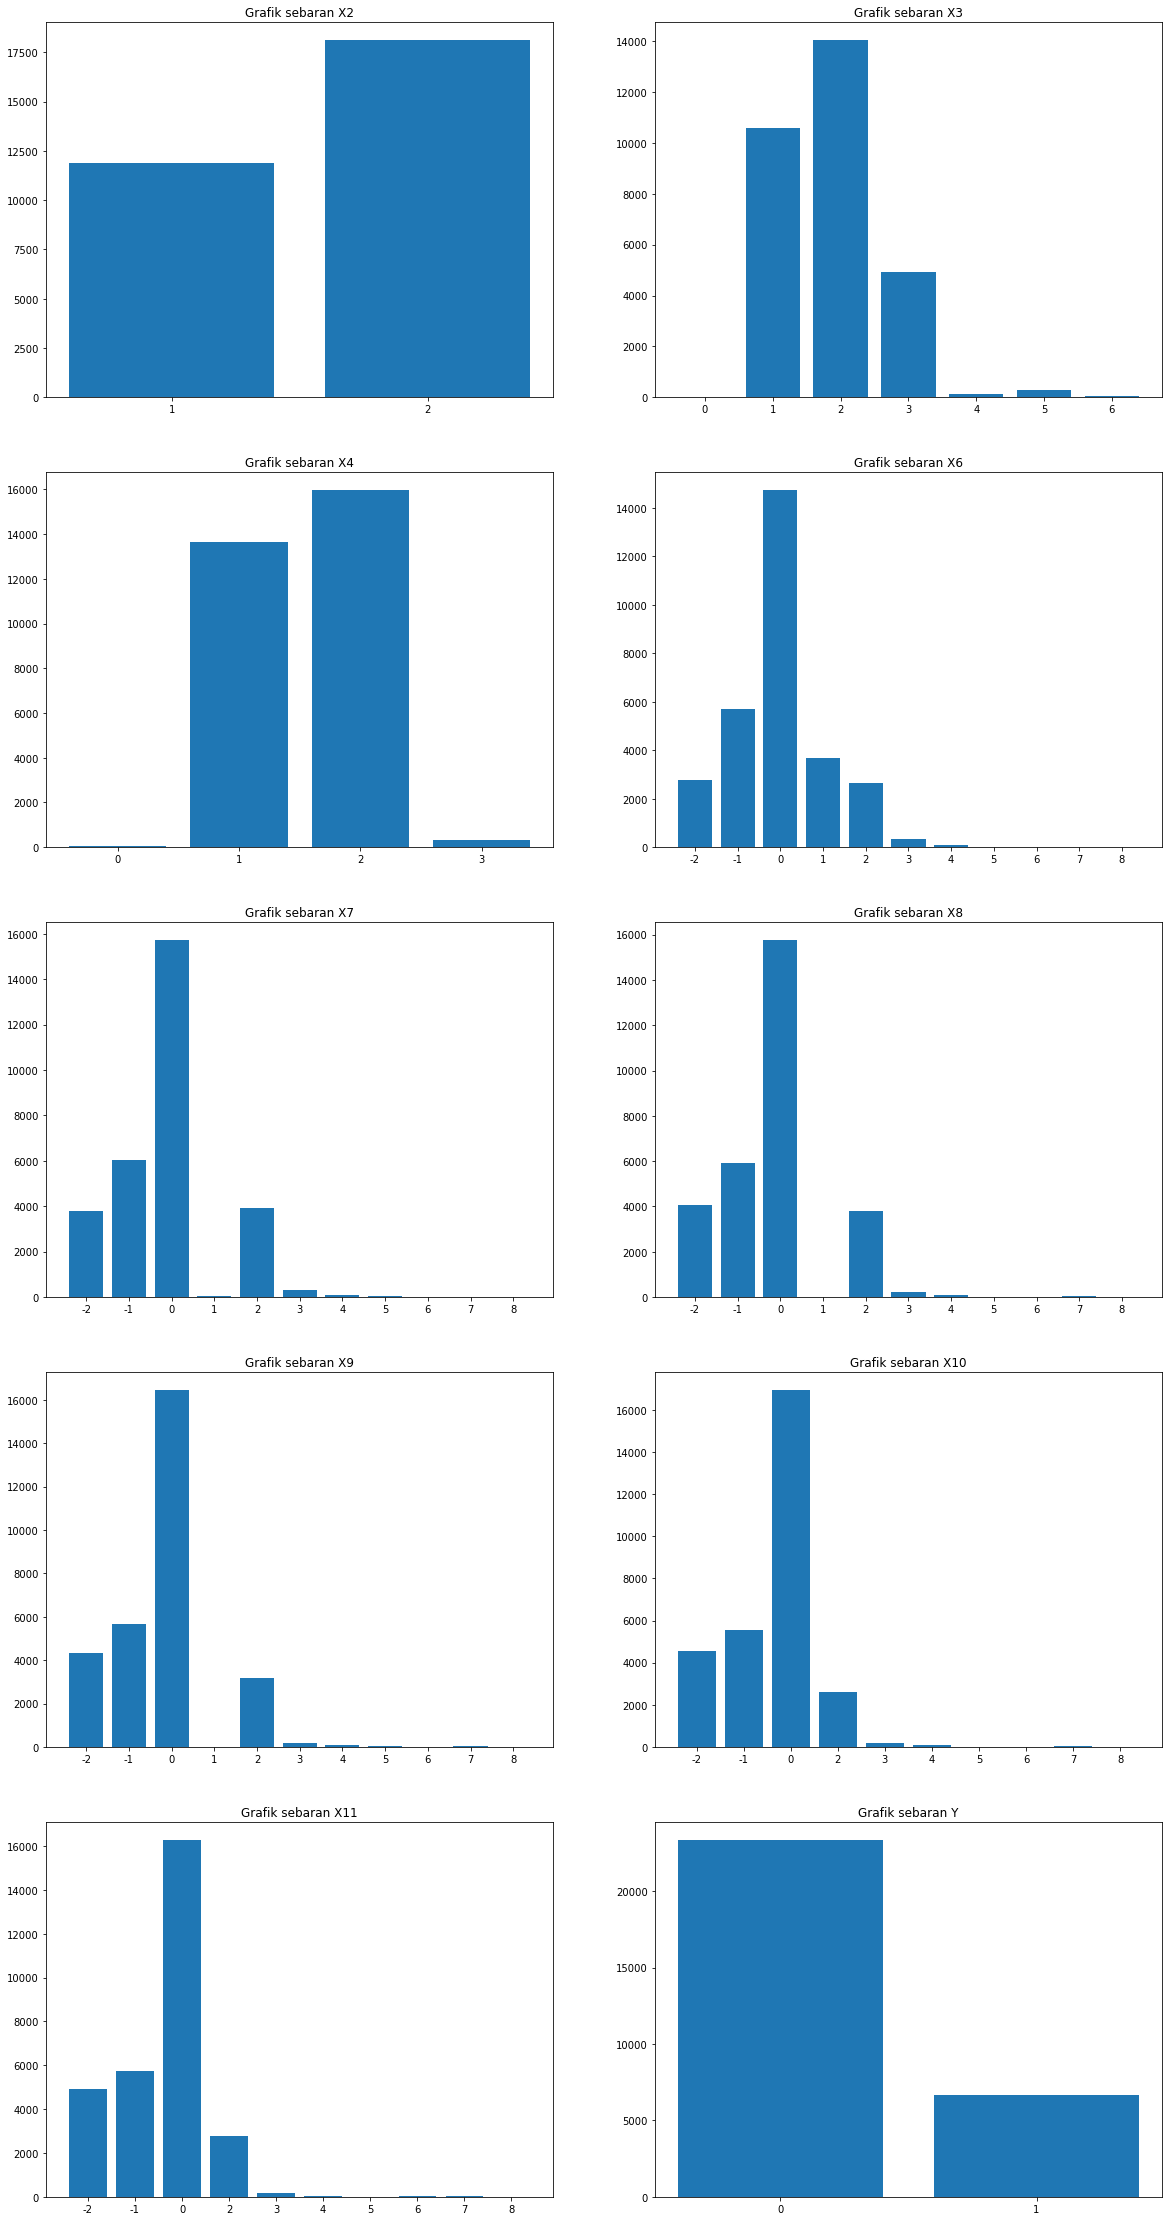

In [14]:
# plotting distribution of categorical features in barplot

plt.figure(figsize=(20,40))

tes = 1
for i in cat:
    plt.subplot(5,2,tes)
    table_cat = pd.crosstab(index = df[i], columns = 'Jumlah')
    table_cat =  table_cat.reset_index()
    table_cat[i] = table_cat[i].astype('str')
    plt.bar(table_cat[i], table_cat['Jumlah'])
    plt.title('Grafik sebaran '+ i)
    tes +=1

__Insight__ :

1. Hanya X2 dan Y yang memilki dua Value.
2. Y (target) memiliki data imbalance (0 dan 1 berbeda jauh)
3. Status pernikahan didominasi oleh yang single/belum menikah
4. X6 - X11 didominasi oleh nilai 0 yang artinya banyak yang bayarnya tidak telat

## Multivariate

1. Melihat hubungan kolom Numerical continues dengan kolom target
2. Melihat hubungan kolom Categorical dengan kolom target

__Numerikal continues - Y (default payment)__

In [15]:
# def fucntion for table Y (default payment) in response to Numerical features

def table_num_y (x):
    tabel = pd.pivot_table(df_stat, values=x, index='Y', aggfunc=np.mean).round(2)
    tabel.rename(columns={x:'Rata-rata '+x + ' di masing2 Default Payment'}, inplace=True)
    return tabel

In [16]:
table_num_y(num[1])

,Rata-rata X5 di masing2 Default Payment
Y,
0,35.42
1,35.73


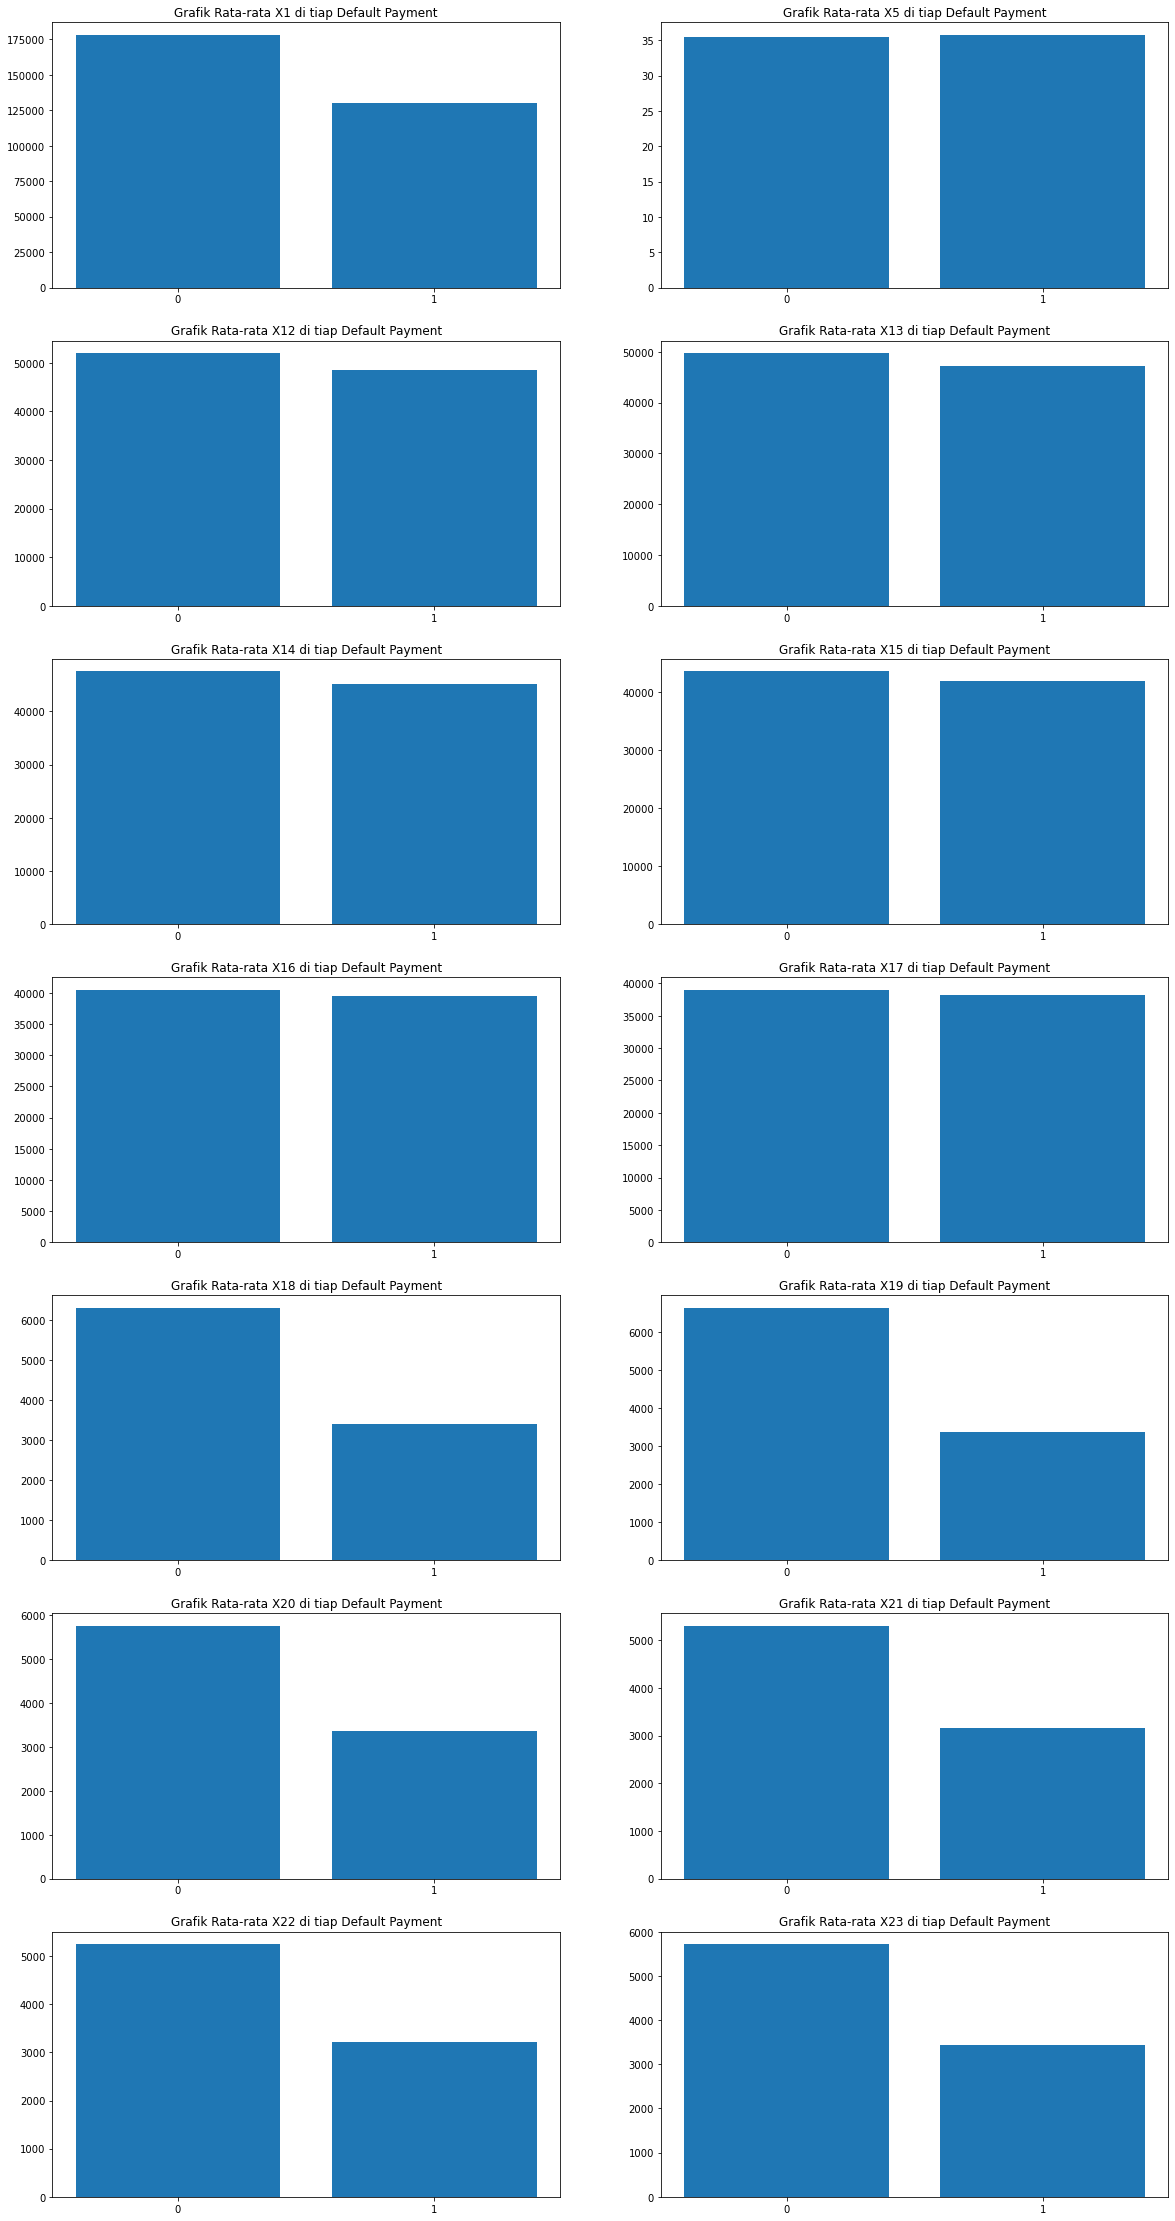

In [17]:
plt.figure(figsize=(20,40))

for i in num:
    bla = pd.pivot_table(df_stat, values=i, index='Y', aggfunc=np.mean).round(2)
    bla = bla.reset_index()
    bla['Y'] = bla['Y'].astype('str')
    plt.subplot(7,2,(num.index(i) + 1))
    plt.bar(bla['Y'], bla[i])
    plt.title("Grafik Rata-rata " + i + " di tiap Default Payment")

__Insight__ :

1. X5, X12 - X17 memiliki nilai rata2 yang tidak bebrbeda signikan untuk masing2 Default Paymentnya, yang lainnya memiliki perbedaan yang cukup signifikan

__Categorical - Y (default payment)__

In [18]:
# def fucntion for table Y (default payment) in response to Categorical features

def table_cat_y (x):
    table = pd.crosstab(index=[df_stat['Y'], df_stat[x]], columns='Jumlah')
    
    persen = []
    if x == 'X3':
        for i in (table.reset_index()['Y']).unique():
            if i == 0 :
                for j in (table.reset_index()[x]).unique():
                    persen.append(
                        round((table.loc[i,j][0]/(table.loc[i]).sum()[0])*100, 2)
                    )
            elif i == 1 :
                for k in range(1,7):
                    persen.append(
                        round((table.loc[i,k][0]/(table.loc[i]).sum()[0])*100, 2)
                    )
                    
    elif x == 'X7':
        for l in (table.reset_index()['Y']).unique():
            if l == 0 :
                for m in (table.reset_index()[x]).unique():
                    persen.append(
                        round((table.loc[l,m][0]/(table.loc[l]).sum()[0])*100, 2)
                    )
            elif n == 1 :
                for n in range(-2,8):
                    persen.append(
                        round((table.loc[l,n][0]/(table.loc[l]).sum()[0])*100, 2)
                    )
                    
    elif (x == 'X10') | (x == 'X11'):
        for o in (table.reset_index()['Y']).unique():
            if o == 0 :
                for p in [-2, -1, 0, 2, 3, 4, 5, 6, 7]:
                    persen.append(
                        round((table.loc[o,p][0]/(table.loc[o]).sum()[0])*100, 2)
                    )
            elif o == 1 :
                for q in [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]:
                    persen.append(
                        round((table.loc[o,q][0]/(table.loc[o]).sum()[0])*100, 2)
                    )                
                    
    else :
        for a in (table.reset_index()['Y']).unique():
            for b in (table.reset_index()[x]).unique():
                persen.append(
                    round((table.loc[a,b][0]/(table.loc[a]).sum()[0])*100, 2)
                )

    table['Persentase tiap Y(%)'] = persen
    return table

In [19]:
table_cat_y(cat[1])

col_0  Jumlah  Persentase tiap Y(%)
Y X3                               
0 0        14                  0.06
  1      8549                 36.59
  2     10700                 45.80
  3      3680                 15.75
  4       116                  0.50
  5       262                  1.12
  6        43                  0.18
1 1      2036                 30.68
  2      3330                 50.18
  3      1237                 18.64
  4         7                  0.11
  5        18                  0.27
  6         8                  0.12

In [20]:
len(cat)

10

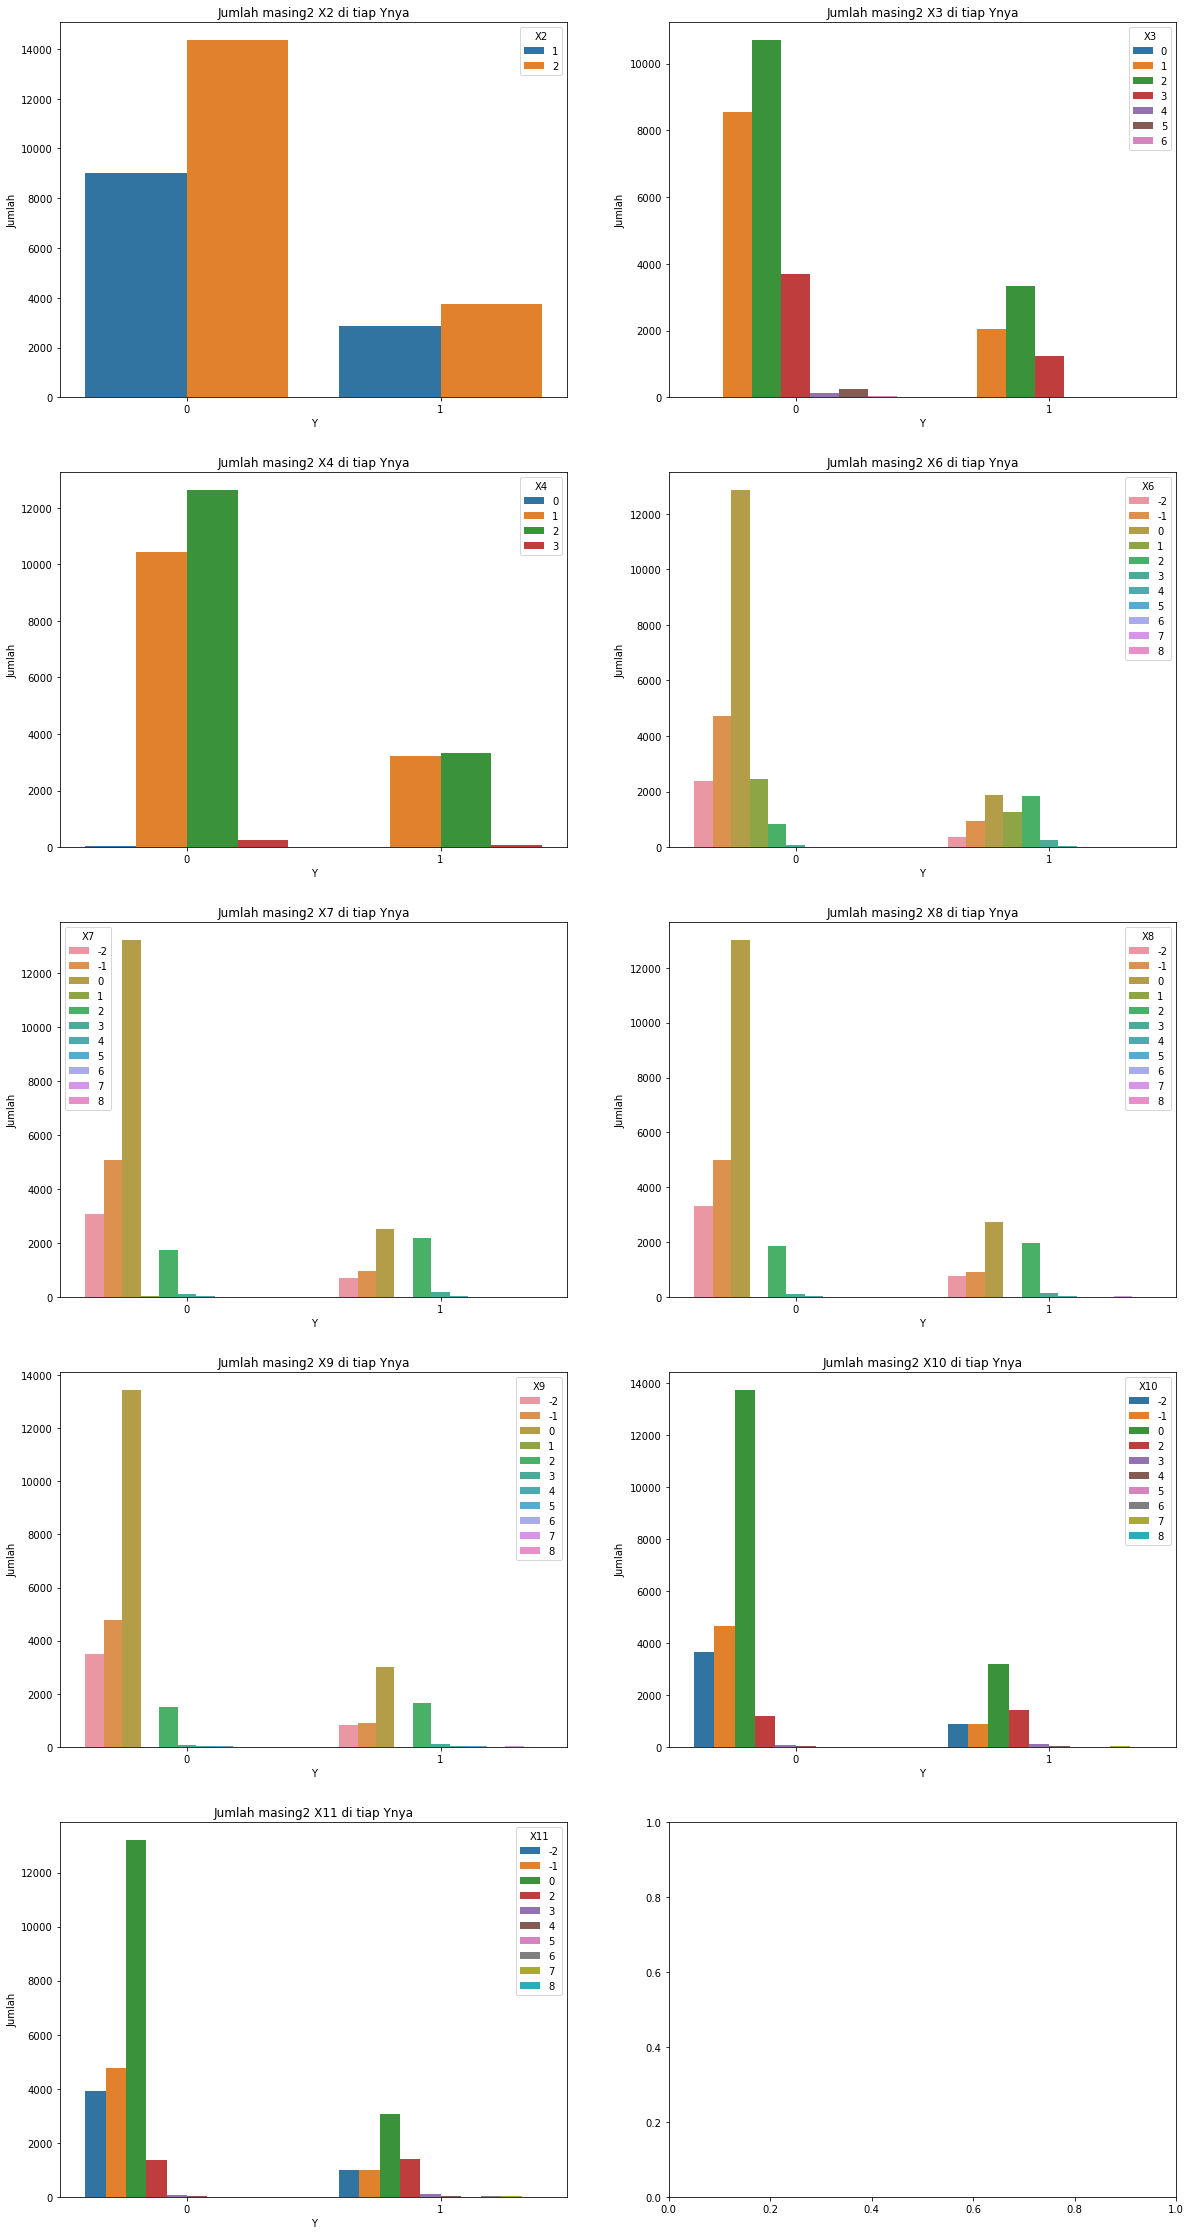

In [21]:
fig, axes = plt.subplots(5, 2, figsize=(20, 40))
for i in cat:
    if i != 'Y' : 
        bla2 = pd.crosstab(index=[df_stat['Y'], df_stat[i]], columns='Jumlah')
        bla2 = bla2.reset_index()

        if cat.index(i) < 2:
            sns.barplot(ax = axes[0,cat.index(i)], x='Y', y='Jumlah', data = bla2, hue=i)
            axes[0,(cat.index(i))].set_title('Jumlah masing2 ' + i + ' di tiap Ynya')
        elif 2 <= cat.index(i) < 4:
            sns.barplot(ax = axes[1,(cat.index(i) - 2)], x='Y', y='Jumlah', data = bla2, hue=i)
            axes[1,(cat.index(i)-2)].set_title('Jumlah masing2 ' + i + ' di tiap Ynya')
        elif 4 <= cat.index(i) < 6:
            sns.barplot(ax = axes[2,(cat.index(i) - 4)], x='Y', y='Jumlah', data = bla2, hue=i)
            axes[2,(cat.index(i)-4)].set_title('Jumlah masing2 ' + i + ' di tiap Ynya')
        elif 6 <= cat.index(i) < 8:
            sns.barplot(ax = axes[3,(cat.index(i) - 6)], x='Y', y='Jumlah', data = bla2, hue=i)
            axes[3,(cat.index(i)-6)].set_title('Jumlah masing2 ' + i + ' di tiap Ynya')
        elif 8 <= cat.index(i) < 9:
            sns.barplot(ax = axes[4,(cat.index(i) - 8)], x='Y', y='Jumlah', data = bla2, hue=i)
            axes[4,(cat.index(i)-8)].set_title('Jumlah masing2 ' + i + ' di tiap Ynya')

__Insight__ :

1. masing-masing nilai di Categorical Features,  memiliki jumlah yang  bebrbeda signikan untuk masing2 Default Paymentnya
2. Dapat dilihat bahwa dari X6 - X11 untuk default payment = 1, masih tetap didominasi dengan nilai 0 yanng artinya di dalam kelompok orang-orang yang gagal bayar tagihan bulan selanjutnya, justru masih didominasi oleh orang2 yang tepat waktu bayar tagihannya

# MACHINE LEARNING

- Kolom target = 'Y'

__LAKUKAN Adding features__

Jadi untuk Kolom : 
1. 'X6', 'X7', 'X8', 'X9', 'X10', 'X11' ==> dikelompokkan jadi 1 kolom yang isinya __modus__ dari masing2 baris ==> maksudnya dicari nilai modusnya untuk 5 bulan terakhir. ==> dicari modusnya karena kolom tersebut adalah kategorikal
2. 'X12', 'X13', 'X14', 'X15', 'X16', 'X17' ==> dikelompokkan jadi 1 kolom yang isinya __rata2__ dari masing2 baris ==> maksudnya dicari nilai meannya untuk 5 bulan terakhir ==> dicari meannya karena kolom tersebut adalah numerikal
3. 'X18', 'X19', 'X20', 'X21', 'X22', 'X23' ==> dikelompokkan jadi 1 kolom yang isinya __rata2__ dari masing2 baris ==> maksudnya dicari nilai meannya untuk 5 bulan terakhir ==> dicari meannya karena kolom tersebut adalah numerikal

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PowerTransformer, OneHotEncoder, PolynomialFeatures

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
aa = []
for i in range (len(df)):
    aa.append(df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].loc[i].mode()[0])

In [24]:
df['modeX6X11'] = aa

In [25]:
bb = []
for i in range(len(df)):
    bb.append((df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].loc[i].sum())/6)

In [26]:
df['meanX12X17'] = bb

In [27]:
cc = []
for i in range(len(df)):
    cc.append((df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].loc[i].sum())/6)

In [72]:
df['meanX18X23'] = cc

In [73]:
df_1 = df.drop(columns=['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'])

In [74]:
df_1[['X1', 'X2', 'X5', 'Y']] = df_1[['X1', 'X2', 'X5', 'Y']].astype('int') 

In [75]:
df_1.head()

,X1,X2,X3,X4,X5,Y,modeX6X11,meanX12X17,meanX18X23
0,20000,2,2,1,24,1,-2,1284.000000,114.833333
1,120000,2,2,2,26,1,0,2846.166667,833.333333
2,90000,2,2,2,34,0,0,16942.166667,1836.333333
3,50000,2,2,1,37,0,0,38555.666667,1398.000000
4,50000,1,2,1,57,0,0,18223.166667,9841.500000


In [76]:
df_1['modeX6X11'].value_counts()

 0    16746
-1     6219
-2     4506
 2     2348
 3       76
 7       53
 4       39
 1        8
 5        3
 8        1
 6        1
Name: modeX6X11, dtype: int64

In [77]:
## recategorize kolom 'modeX6X11'

df_1['Rec_modeX6X11'] = ''
df_1['Rec_modeX6X11'][df_1['modeX6X11']< 0] = '< 0'
df_1['Rec_modeX6X11'][df_1['modeX6X11'] == 0] = '0'
df_1['Rec_modeX6X11'][(df_1['modeX6X11'] > 0) & (df_1['modeX6X11'] <= 5)] = '1 - 5'
df_1['Rec_modeX6X11'][(df_1['modeX6X11'] > 5) & (df_1['modeX6X11'] < 9)] = '> 5'
df_1 = df_1.drop(columns='modeX6X11')
df_1.head()

,X1,X2,X3,X4,X5,Y,meanX12X17,meanX18X23,Rec_modeX6X11
0,20000,2,2,1,24,1,1284.000000,114.833333,< 0
1,120000,2,2,2,26,1,2846.166667,833.333333,0
2,90000,2,2,2,34,0,16942.166667,1836.333333,0
3,50000,2,2,1,37,0,38555.666667,1398.000000,0
4,50000,1,2,1,57,0,18223.166667,9841.500000,0


## Cek Imbalance Data

In [78]:
df_1['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

0 == > tidak susah untuk bayar tagihan bulan selanjutnya

1 ==> susah/sulit untuk bayar tagihan bulan selanjutnya

## Splitting Data

In [79]:
X = df_1.drop(columns='Y')
y = df_1['Y']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.20, random_state=42)

## PIPELINE

In [82]:
num_columns = ['X1', 'X5', 'meanX12X17', 'meanX18X23']

cat_columns = ['X2', 'X3', 'X4', 'Rec_modeX6X11']

In [83]:
numeric_pipeline = Pipeline([
#     ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('power', PowerTransformer(method='yeo-johnson'))
])

categoric_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns),
    ('categorical', categoric_pipeline, cat_columns)
])

pipe_SVM = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

pipe_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier(random_state=42))
])

pipe_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42))
])

## Def Eva Metrix

Fungsi def yg isinya evaluation metrix.
Evaluation matrix yang dipakai kali ini adalah Cunfusion matrix dan Classification report

In [84]:
def conf_mat (Model, X_train, X_test, y_train, y_test,Nama):
    y_pred_test = Model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=[1,0])
    df = pd.DataFrame(cm_test, index = ['Akt1', 'Akt0'], columns=['Pred1', 'Pred0'])
    print( 'Classification report data test ' + Nama + '\n\n', classification_report(y_test, y_pred_test))
    
    y_pred_train = Model.predict(X_train)
    print( 'Classification report data train ' + Nama + '\n\n', classification_report(y_train, y_pred_train))
#     return plt.title('Confusion matrix data test ' + Nama + '\n'), sns.heatmap(df, annot=True)
    print ('Confusion matrix data test ' + Nama + '\n')
    return df

## Modelling

model yang dipakai ada 3 algoritma yaitu : Decision Tree Classifier (DT), Random Forest Classifier (RF) dan XG Boost Classifuer (XGB)

__DT__

In [85]:
pipe_DT.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo', DecisionTreeClassifier(r

In [86]:
conf_mat(pipe_DT, X_train, X_test, y_train, y_test, 'DT Base')

Classification report data test DT Base

               precision    recall  f1-score   support

           0       0.81      0.79      0.80      4673
           1       0.32      0.34      0.33      1327

    accuracy                           0.69      6000
   macro avg       0.56      0.57      0.56      6000
weighted avg       0.70      0.69      0.70      6000

Classification report data train DT Base

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion matrix data test DT Base



,Pred1,Pred0
Akt1,447,880
Akt0,962,3711


__RF__

In [87]:
pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo', RandomForestClassifier(r

In [88]:
conf_mat(pipe_RF, X_train, X_test, y_train, y_test, 'RF Base')

Classification report data test RF Base

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.58      0.25      0.35      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.60      0.61      6000
weighted avg       0.76      0.79      0.76      6000

Classification report data train RF Base

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18691
           1       1.00      1.00      1.00      5309

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion matrix data test RF Base



,Pred1,Pred0
Akt1,329,998
Akt0,241,4432


__SVM__

In [89]:
pipe_SVM.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo', SVC(max_iter=500))])

In [90]:
conf_mat(pipe_SVM, X_train, X_test, y_train, y_test, 'SVM Base')

Classification report data test SVM Base

               precision    recall  f1-score   support

           0       0.81      0.58      0.68      4673
           1       0.26      0.51      0.34      1327

    accuracy                           0.57      6000
   macro avg       0.53      0.55      0.51      6000
weighted avg       0.69      0.57      0.60      6000

Classification report data train SVM Base

               precision    recall  f1-score   support

           0       0.82      0.59      0.69     18691
           1       0.27      0.54      0.36      5309

    accuracy                           0.58     24000
   macro avg       0.55      0.57      0.53     24000
weighted avg       0.70      0.58      0.62     24000

Confusion matrix data test SVM Base



,Pred1,Pred0
Akt1,679,648
Akt0,1955,2718


__Penjelasan Eva Metrix__

Dalam hal ini kita memfokuskan diri di recall karena 

ketika prediksi 0 tetapi aktual 1 itu lebih berbahaya.

Harus ditekan False Negatifnya

tpi bukan berarti False positif tinggi tidak memberikan efek juga jd harus diusahakan untuk lebih kecil juga false positifnya

## HyperParameter Tuning

In [91]:
skf = StratifiedKFold(n_splits=3)

========================

__DT__

========================

In [92]:
param_DT = {
    'algo__max_depth': list(np.arange(0, 101, 5)) + [None],
    'algo__min_samples_leaf': np.arange(1, 50, 5),
#     'algo__max_features': [0, 0.2, 0.4, 0.6, 0.8, 1]
    'algo__class_weight': [None, {0:.4, 1:.6}, {0:.3, 1:.7}, {0:.2, 1:.8}, {0:.15, 1: .85}, {0:.1, 1:.9}]
}

In [93]:
DT_RS = RandomizedSearchCV(pipe_DT, param_DT, cv=skf, n_iter=100, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [94]:
cat_columns

['X2', 'X3', 'X4', 'Rec_modeX6X11']

In [95]:
X_train[cat_columns[3]].value_counts()

0        13408
< 0       8576
1 - 5     1978
> 5         38
Name: Rec_modeX6X11, dtype: int64

In [96]:
DT_RS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['X1',
                                                                                'X5',
                                                                                'meanX12X17',
                                        

In [97]:
DT_RS.best_params_

{'algo__min_samples_leaf': 46,
 'algo__max_depth': 5,
 'algo__class_weight': {0: 0.1, 1: 0.9}}

In [101]:
pd.DataFrame(DT_RS.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algo__min_samples_leaf', 'param_algo__max_depth',
       'param_algo__class_weight', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [102]:
tab_hyper_DT = pd.DataFrame(DT_RS.cv_results_)[['param_algo__min_samples_leaf', 'param_algo__max_depth', 'param_algo__class_weight', 'mean_test_score']]
tab_hyper_DT = (tab_hyper_DT.sort_values(by='mean_test_score', ascending=False).reset_index()).drop(columns='index')
tab_hyper_DT[tab_hyper_DT['mean_test_score'] > 0.7]

,param_algo__min_samples_leaf,param_algo__max_depth,param_algo__class_weight,mean_test_score
0,46,5,"{0: 0.1, 1: 0.9}",0.921260
1,31,5,"{0: 0.1, 1: 0.9}",0.920884
2,1,5,"{0: 0.15, 1: 0.85}",0.838014
3,46,40,"{0: 0.1, 1: 0.9}",0.796946
4,41,15,"{0: 0.1, 1: 0.9}",0.793367
5,16,10,"{0: 0.15, 1: 0.85}",0.780932
6,41,85,"{0: 0.1, 1: 0.9}",0.779053
7,36,75,"{0: 0.1, 1: 0.9}",0.776229
8,11,15,"{0: 0.1, 1: 0.9}",0.768879
9,31,95,"{0: 0.1, 1: 0.9}",0.751929


______________
_UNTUK yng best estimator_
_____________

In [103]:
DT_tune = DT_RS.best_estimator_

In [104]:
DT_tune.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo',
                 Decisio

In [105]:
conf_mat(DT_tune, X_train, X_test, y_train, y_test, 'DT Tuned')

Classification report data test DT Tuned

               precision    recall  f1-score   support

           0       0.92      0.12      0.22      4673
           1       0.24      0.96      0.38      1327

    accuracy                           0.31      6000
   macro avg       0.58      0.54      0.30      6000
weighted avg       0.77      0.31      0.25      6000

Classification report data train DT Tuned

               precision    recall  f1-score   support

           0       0.94      0.13      0.23     18691
           1       0.24      0.97      0.39      5309

    accuracy                           0.32     24000
   macro avg       0.59      0.55      0.31     24000
weighted avg       0.78      0.32      0.26     24000

Confusion matrix data test DT Tuned



,Pred1,Pred0
Akt1,1280,47
Akt0,4103,570


__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif berkurang diiring dengan recall yang naik, tetapi False postif kelewat batas jd coba dicari lagi kombinasi yang tepat

_______________
_{'algo__min_samples_leaf': 41, 'algo__max_depth': 85, 'algo__class_weight': {0: 0.1, 1: 0.9}}_
_______________

In [114]:
pipe_DT_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier(min_samples_leaf=41, max_depth=85, class_weight={0:0.1, 1 : 0.9}, random_state=42))
])

In [115]:
pipe_DT_1.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo',
                 Decisio

In [116]:
conf_mat(pipe_DT_1, X_train, X_test, y_train, y_test, 'DT 1')

Classification report data test DT 1

               precision    recall  f1-score   support

           0       0.87      0.38      0.53      4673
           1       0.27      0.81      0.40      1327

    accuracy                           0.47      6000
   macro avg       0.57      0.59      0.47      6000
weighted avg       0.74      0.47      0.50      6000

Classification report data train DT 1

               precision    recall  f1-score   support

           0       0.96      0.41      0.57     18691
           1       0.31      0.94      0.47      5309

    accuracy                           0.53     24000
   macro avg       0.63      0.67      0.52     24000
weighted avg       0.82      0.53      0.55     24000

Confusion matrix data test DT 1



,Pred1,Pred0
Akt1,1069,258
Akt0,2899,1774


__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif sedikit bertambah dengan recall yang berkurang, tetapi False postif jauh berkurang. cukup

========================

__RF__

========================

In [117]:
param_RF = {
    'algo__n_estimators' : np.arange(100, 1000, 100),
    'algo__max_depth' : np.arange(10, 100, 10),
    'algo__min_samples_leaf' : np.arange(10, 100, 10),
    'algo__class_weight' : [None, {0:.4, 1:.6}, {0:.3, 1:.7}, {0:.2, 1:.8}, {0:.15, 1: .85}, {0:.1, 1:.9}]
}

In [118]:
RF_RS = RandomizedSearchCV(pipe_RF, param_RF, cv=skf, n_iter=100, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [119]:
RF_RS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['X1',
                                                                                'X5',
                                                                                'meanX12X17',
                                        

In [120]:
RF_RS.best_params_

{'algo__n_estimators': 900,
 'algo__min_samples_leaf': 90,
 'algo__max_depth': 20,
 'algo__class_weight': {0: 0.1, 1: 0.9}}

In [122]:
tab_hyper_RF = pd.DataFrame(RF_RS.cv_results_)[['param_algo__n_estimators', 'param_algo__min_samples_leaf', 'param_algo__max_depth', 'param_algo__class_weight', 'mean_test_score']]
tab_hyper_RF = (tab_hyper_RF.sort_values(by='mean_test_score', ascending=False).reset_index()).drop(columns='index')
tab_hyper_RF[tab_hyper_RF['mean_test_score'] > 0.7].loc[10:35]

,param_algo__n_estimators,param_algo__min_samples_leaf,param_algo__max_depth,param_algo__class_weight,mean_test_score
10,900,40,60,"{0: 0.1, 1: 0.9}",0.887172
11,600,40,60,"{0: 0.1, 1: 0.9}",0.886795
12,200,30,30,"{0: 0.1, 1: 0.9}",0.865134
13,600,30,50,"{0: 0.1, 1: 0.9}",0.864381
14,500,90,10,"{0: 0.15, 1: 0.85}",0.827088
15,200,90,10,"{0: 0.15, 1: 0.85}",0.827087
16,200,90,70,"{0: 0.15, 1: 0.85}",0.826522
17,600,90,20,"{0: 0.15, 1: 0.85}",0.824827
18,800,20,70,"{0: 0.1, 1: 0.9}",0.813526
19,800,70,90,"{0: 0.15, 1: 0.85}",0.811453


______________
_UNTUK yng best estimator_
_____________

In [123]:
RF_tune = RF_RS.best_estimator_

In [124]:
RF_tune.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo',
                 RandomF

In [125]:
conf_mat(RF_tune, X_train, X_test, y_train, y_test, 'RF Tuned')

Classification report data test RF Tuned

               precision    recall  f1-score   support

           0       0.92      0.23      0.36      4673
           1       0.25      0.93      0.40      1327

    accuracy                           0.38      6000
   macro avg       0.59      0.58      0.38      6000
weighted avg       0.77      0.38      0.37      6000

Classification report data train RF Tuned

               precision    recall  f1-score   support

           0       0.95      0.24      0.39     18691
           1       0.26      0.96      0.41      5309

    accuracy                           0.40     24000
   macro avg       0.61      0.60      0.40     24000
weighted avg       0.80      0.40      0.40     24000

Confusion matrix data test RF Tuned



,Pred1,Pred0
Akt1,1238,89
Akt0,3621,1052


__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif berkurang diiring dengan recall yang naik, tetapi False postif kelewat batas jd coba dicari lagi kombinasi yang tepat

______________
_{'n_estimators': 700,
 'min_samples_leaf': 40,
 'max_depth': 40,
 'class_weight': {0: 0.15, 1: 0.85}}_
_____________

In [126]:
pipe_RF_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_estimators=700, min_samples_leaf=40, max_depth=40, class_weight={0:0.15, 1 : 0.85}, random_state=42))
])

In [127]:
pipe_RF_1.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo',
                 RandomF

In [128]:
conf_mat(pipe_RF_1, X_train, X_test, y_train, y_test, 'RF 1')

Classification report data test RF 1

               precision    recall  f1-score   support

           0       0.89      0.51      0.65      4673
           1       0.31      0.77      0.44      1327

    accuracy                           0.57      6000
   macro avg       0.60      0.64      0.55      6000
weighted avg       0.76      0.57      0.60      6000

Classification report data train RF 1

               precision    recall  f1-score   support

           0       0.93      0.54      0.69     18691
           1       0.35      0.86      0.50      5309

    accuracy                           0.61     24000
   macro avg       0.64      0.70      0.59     24000
weighted avg       0.80      0.61      0.65     24000

Confusion matrix data test RF 1



,Pred1,Pred0
Akt1,1020,307
Akt0,2272,2401


__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif sedikit bertambah dengan recall yang berkurang, tetapi False postif jauh berkurang. cukup

========================

__SVM__

========================

In [129]:
param_SVM = {
    'algo__C' : np.arange(0, 10, 1),
    'algo__kernel' : ['linear', 'poly', 'rbf'],
    'algo__gamma' : [0.001, 0.01, 0.05, 0.1, 0.5, 1, 'scale']
}

In [130]:
SVM_RS = RandomizedSearchCV(pipe_SVM, param_SVM, cv=skf, n_iter=100, n_jobs=-1, verbose=1, random_state=42, scoring='recall')

In [132]:
SVM_RS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                               ('power',
                                                                                                PowerTransformer())]),
                                                                               ['X1',
                                                                                'X5',
                                                                                'meanX12X17',
                                        

In [133]:
SVM_RS.best_params_

{'algo__kernel': 'poly', 'algo__gamma': 0.01, 'algo__C': 8}

In [144]:
tab_hyper_SVM = pd.DataFrame(SVM_RS.cv_results_)[['param_algo__C', 'param_algo__kernel', 'param_algo__gamma', 'mean_test_score']]
tab_hyper_SVM = (tab_hyper_SVM.sort_values(by='mean_test_score', ascending=False).reset_index()).drop(columns='index')
tab_hyper_SVM[(tab_hyper_SVM['mean_test_score'] < 0.85) & (tab_hyper_SVM['mean_test_score'] > 0.6)]

,param_algo__C,param_algo__kernel,param_algo__gamma,mean_test_score
34,3,rbf,0.01,0.796940
35,1,linear,1,0.756070
36,1,linear,0.1,0.756070
37,1,linear,0.01,0.756070
38,5,linear,0.01,0.698764
39,5,linear,0.5,0.698764
40,6,poly,0.5,0.692835
41,7,linear,0.5,0.678100
42,7,linear,scale,0.678100
43,7,linear,0.001,0.678100


______________
_UNTUK yng best estimator_
_____________

In [135]:
SVM_tune = SVM_RS.best_estimator_

In [136]:
SVM_tune.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['X1', 'X5', 'meanX12X17',
                                                   'meanX18X23']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['X2', 'X3', 'X4',
                                                   'Rec_modeX6X11'])])),
                ('algo', SVC(C=8, gamma=0.01, ker

In [137]:
conf_mat(SVM_tune, X_train, X_test, y_train, y_test, 'SVM Tuned')

Classification report data test SVM Tuned

               precision    recall  f1-score   support

           0       0.80      0.00      0.00      4673
           1       0.22      1.00      0.36      1327

    accuracy                           0.22      6000
   macro avg       0.51      0.50      0.18      6000
weighted avg       0.67      0.22      0.08      6000

Classification report data train SVM Tuned

               precision    recall  f1-score   support

           0       0.64      0.00      0.00     18691
           1       0.22      1.00      0.36      5309

    accuracy                           0.22     24000
   macro avg       0.43      0.50      0.18     24000
weighted avg       0.55      0.22      0.08     24000

Confusion matrix data test SVM Tuned



,Pred1,Pred0
Akt1,1326,1
Akt0,4669,4


__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif berkurang hingga 0 diiring dengan recall yang naik hingga 1, tetapi False postif kelewat batas jd coba dicari lagi kombinasi yang tepat

______________
_{'kernel': 'linear', 'gamma': 0.01, 'C': 1}_
_____________

In [148]:
pipe_SVM_1 = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel='poly', gamma=1, C=3) )
])

In [ ]:
pipe_SVM_1.fit(X_train, y_train)

In [ ]:
conf_mat(pipe_SVM_1, X_train, X_test, y_train, y_test, 'SVM 1')

__Penjelasan Eva Matrix__ :

Dapat dilihat bahwa False Negatif sedikit bertambah dengan recall yang berkurang, tetapi False postif jauh berkurang. cukup

# Perbandingan dan Export Model

Berdasarkan Evaluasi di atas, didapatkan bahwa model yang lebih baik yaitu Model DT_1 (Decision Tree) dengan {'min_samples_leaf': 26, 'max_depth': 85, 'class_weight': {0: 0.1, 1: 0.9}}

_______________
__Export Model__
_______________

In [166]:
import joblib

In [168]:
# joblib.dump(DT_1, 'DT.jbl')

# Kesimpulan dan Saran

Berdasarkan Analisa dan pembuatan model diatas dapat disimpulkan bahwa :

1. Default Payment dapat dipengaruhi banyak faktor khususnya dipengaruhi oleh lamanya pembayaran (X6, X11) 

Saran :
1. gunakan Model untuk mengetahui Nasabah lain (yang tidak masuk data train ataupun test) untuk memprediksi nilai Default payment (apakah akan susah pembayaran tagihan kredit atau tidak) yang kemudian berguna untuk pengambilan keputusan mengenai kelanjutan kredit nasabah.